<a href="https://colab.research.google.com/github/gregor-posadas/Gregor-Projects/blob/main/mod02_CarbonModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 02: A Box Model of Land-Atmosphere Carbon Balance




### **Problem A: Modify and rerun the model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0 # Mass of Carbon in Atmosphere [Gt or Gigatons]
M2i = 300.0 # Mass of Carbon in Biosphere[Gt or Gigatons]

k12 = 0.075 # Carbon turnover time from Atmosphere to Biosphere
k21 = 0.1 # Carbon turnover time from Biosphere to Atmosphere

ti = 0.0 # Initial time step in years
tf = 100.0 # Final time step in years
dt = 1/365 # Time step interval value

historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
year = data[:, 0]
cflux = data[:, 1]



In [ ]:
t = np.arange(ti,tf+dt,dt) # Time is expressed as an array beginning with the Initial time step [ti], stopping at the final time step plus the interval [tf+dt], with an interval of dt

Nt = t.size # Outputs the number of time steps for variable "t"

print('t has '+str(Nt)+' time steps') # Explicitly state the number of time steps for "t"

t has 36501 time steps


In [ ]:
M1 = np.zeros((Nt,)) # Creates an array of zeros with array length equal to Nt
M2 = np.zeros((Nt,))

In [ ]:
for i in np.arange(Nt):
    if (i==0): # This is just to ensure that the initial carbon mass content is equal to the value defined in the beginning of this code.

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the atmosphere (Gigatons per year)
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the biosphere (Gigatons per year)

        M1[i] = M1[i-1] + dM1dt*dt # Calculate the current carbon content of the atmosphere by adding the prior interval's carbon content to the product of the rate of change and time step interval
        M2[i] = M2[i-1] + dM2dt*dt # Same as above but for the biosphere


In [ ]:
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) # Analytical solutions
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)

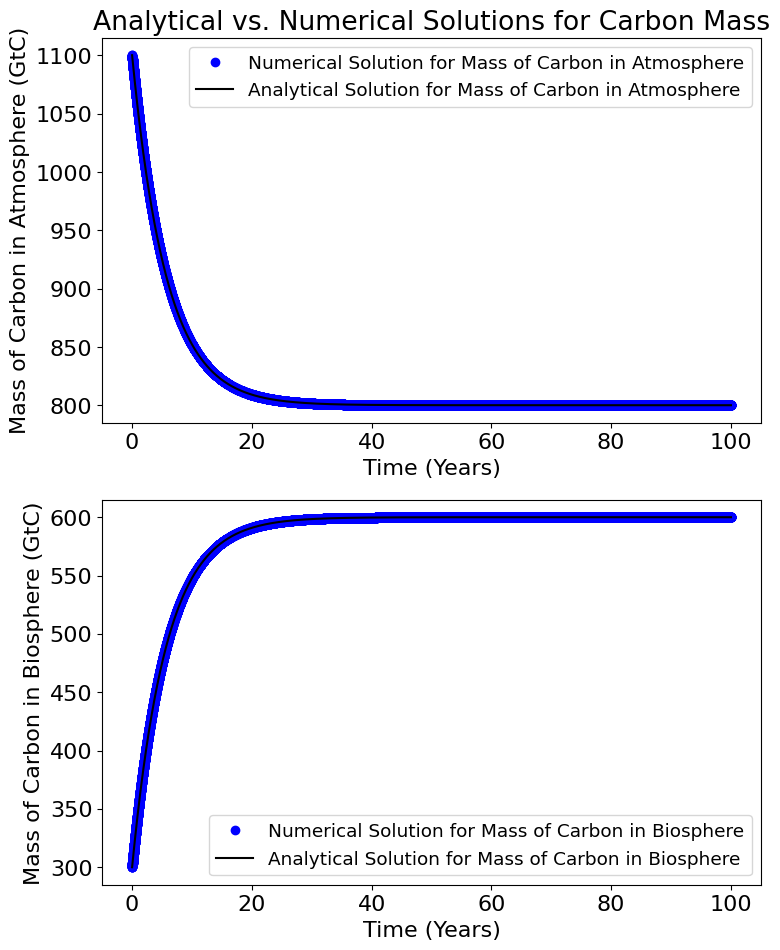

[1100.         1099.85616438 1099.71239773 ...  800.00000751  800.00000751
  800.0000075 ]
[300.         300.14383562 300.28760227 ... 599.99999249 599.99999249
 599.9999925 ]


In [ ]:
# Plot Setup
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Analytical vs. Numerical Solutions for Carbon Mass')
plt.plot(t,M1,'bo', label='Numerical Solution for Mass of Carbon in Atmosphere')
plt.plot(t,M1_anlt,'k-', label='Analytical Solution for Mass of Carbon in Atmosphere')
plt.xlabel('Time (Years)')
plt.ylabel('Mass of Carbon in Atmosphere (GtC)')
plt.legend(fontsize='small')

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='Numerical Solution for Mass of Carbon in Biosphere')
plt.plot(t,M2_anlt,'k-', label='Analytical Solution for Mass of Carbon in Biosphere')
plt.xlabel('Time (Years)')
plt.ylabel('Mass of Carbon in Biosphere (GtC)')
plt.legend(fontsize='small')

plt.show()

print(M1)
print (M2)

### **Problem B: Examine impacts of human emissions**

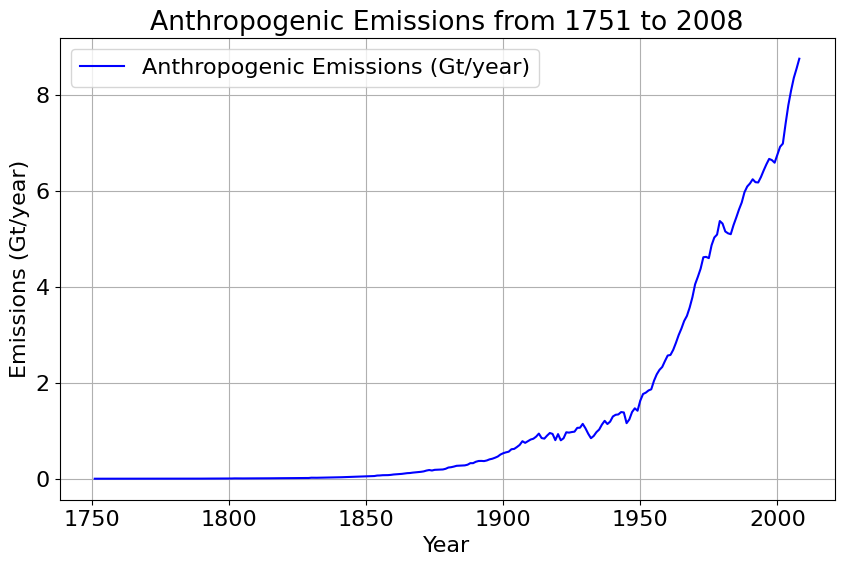

In [ ]:
# Plot the anthropogenic emissions data
plt.figure(figsize=(10, 6))
plt.plot(year, cflux, label='Anthropogenic Emissions (Gt/year)', color='blue')
plt.title('Anthropogenic Emissions from 1751 to 2008')
plt.xlabel('Year')
plt.ylabel('Emissions (Gt/year)')
plt.grid(True)
plt.legend()
plt.show()
cflux = data[:,1] # Carbon flux (Gt/yr) from anthropogenic emissions

#Initial Conditions for Part B
M1i = 800.0 # Resetting initial value to Mass of Carbon in Atmosphere [Gt] at the end of 100-year plot
M2i = 600.0 # Resetting initial value to Mass of Carbon in Biosphere[Gt] at the end of 100-year plot


In [ ]:
t = year
dt = 1 # Time step interval value for yearly data
Nt = t.size # Outputs the number of time steps for variable "t"
M1 = np.zeros((Nt,)) # Creates an array of zeros with array length equal to Nt
M2 = np.zeros((Nt,))
print('t has '+str(Nt)+' time steps') # Explicitly state the number of time steps for "t"


t has 258 time steps


In [ ]:
for i in np.arange(Nt):
    if (i==0): # This is just to ensure that the initial carbon mass content is equal to the value defined in the beginning of this code.

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + cflux[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the atmosphere (Gigatons per year)
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the biosphere (Gigatons per year)

        M1[i] = M1[i-1] + dM1dt*dt # Calculate the current carbon content of the atmosphere by adding the prior interval's carbon content to the product of the rate of change and time step interval
        M2[i] = M2[i-1] + dM2dt*dt # Same as above but for the biosphere



1011.6238255174869


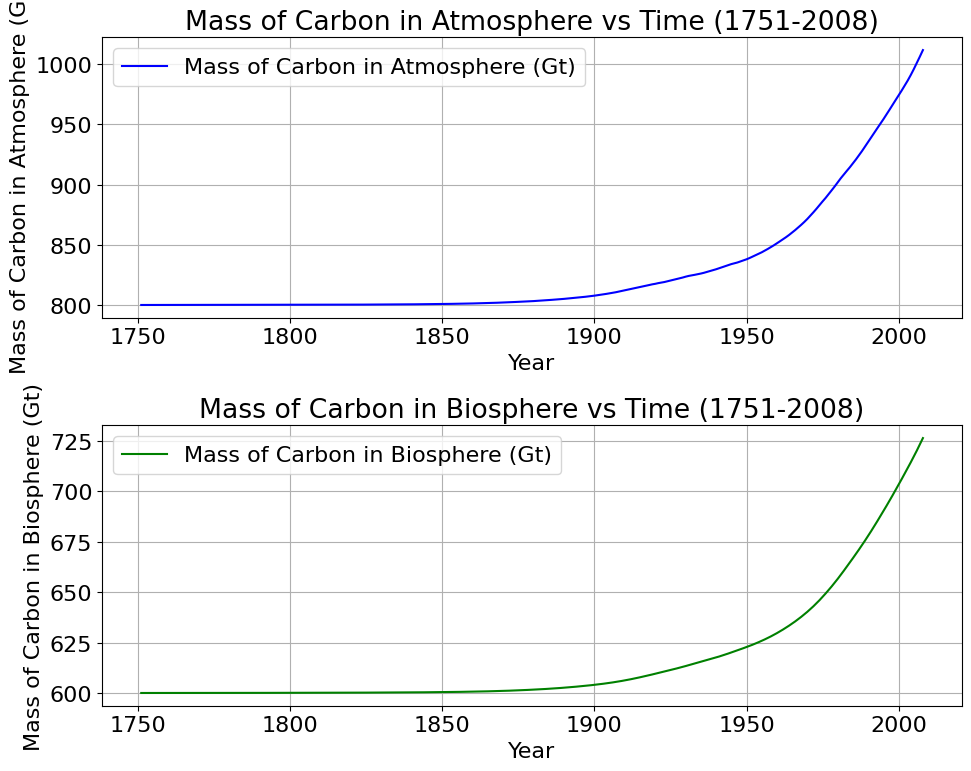

The final mass of carbon in the atmosphere is: 1011.6238255174869 Gt
The final mass of carbon in the biosphere is: 726.3851744825124 Gt


In [ ]:
# Plot the mass of carbon in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t, M1, 'b-', label='Mass of Carbon in Atmosphere (Gt)')
plt.title('Mass of Carbon in Atmosphere vs Time (1751-2008)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Atmosphere (Gt)')
plt.grid(True)
plt.legend()

# Mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t, M2, 'g-', label='Mass of Carbon in Biosphere (Gt)')
plt.title('Mass of Carbon in Biosphere vs Time (1751-2008)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Biosphere (Gt)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('The final mass of carbon in the atmosphere is: '+str(M1[-1])+' Gt')
print('The final mass of carbon in the biosphere is: '+str(M2[-1])+' Gt')


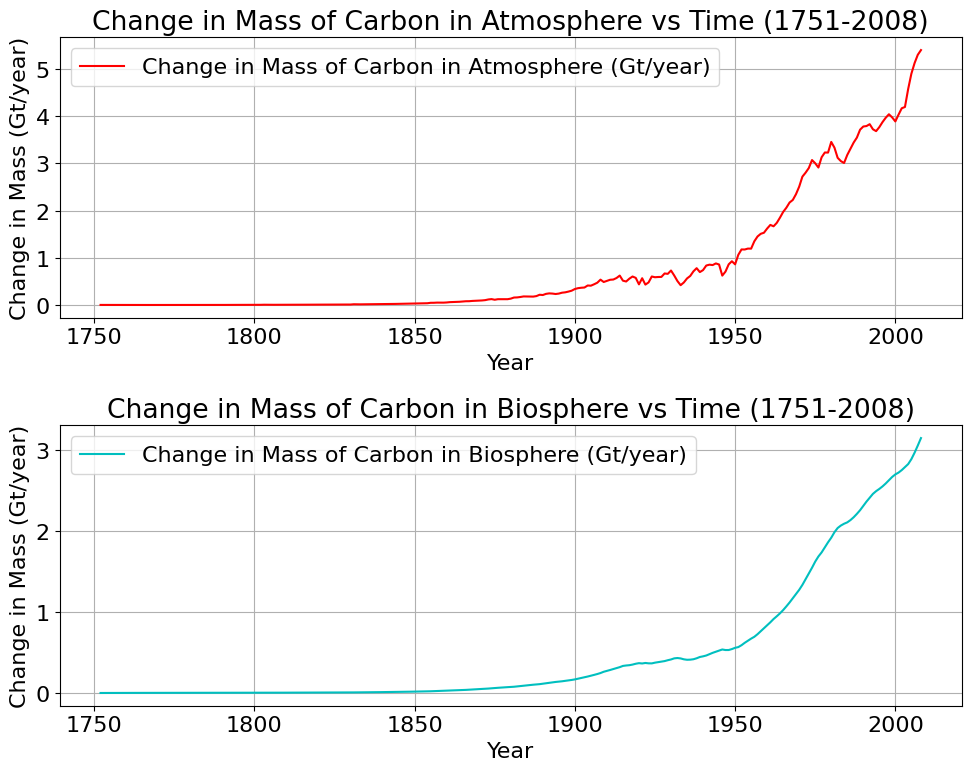

In [ ]:
# Calculate the change in mass over time (difference between consecutive time steps)
dM1 = np.diff(M1)
dM2 = np.diff(M2)

# Plot the change in mass of C in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Change in mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t[1:], dM1, 'r-', label='Change in Mass of Carbon in Atmosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Atmosphere vs Time (1751-2008)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

# Change in mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t[1:], dM2, 'c-', label='Change in Mass of Carbon in Biosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Biosphere vs Time (1751-2008)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### **Problem C: Examine the effects of mitigation**

In [ ]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

# File upload for Emissions Mitigation Scenarios (2008 to 2100)
data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data[:, 0]
cflux_nz2030 = data[:, 1]
cflux_nz2050 = data[:, 2]
cflux_zeg = data[:, 3]

# Initial Conditions for Part C
M1i = 1011.6238255174869  # Resetting initial value to Mass of Carbon in Atmosphere [Gt] at the end of 2008
M2i = 726.3851744825124   # Resetting initial value to Mass of Carbon in Biosphere [Gt] at the end of 2008

t has 93 time steps


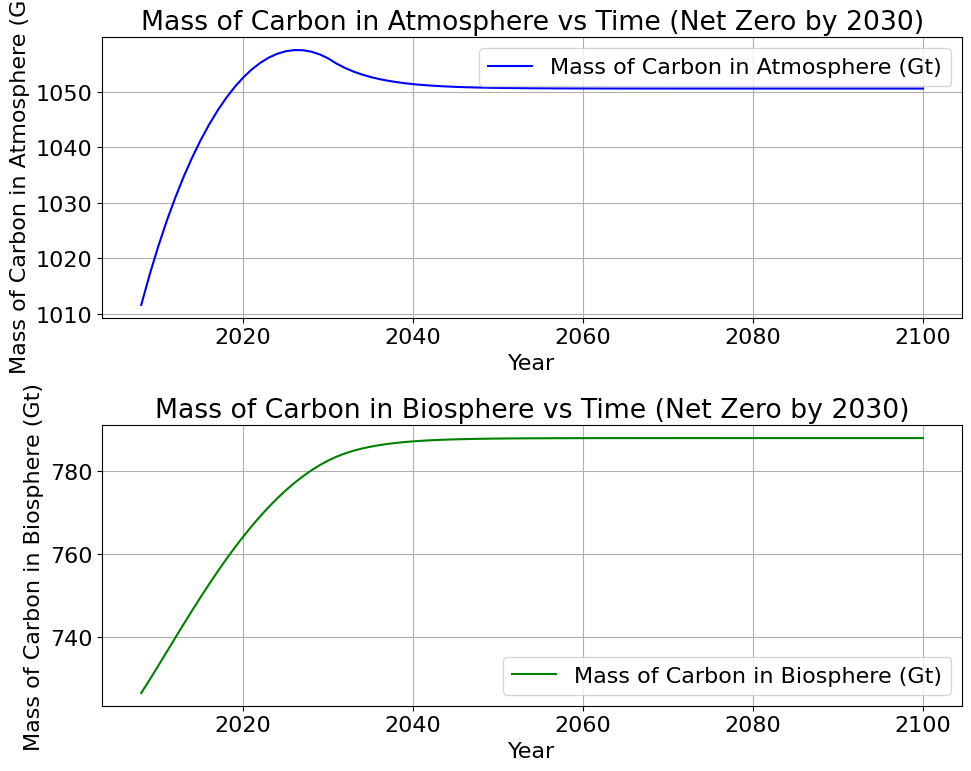

The final mass of carbon in the atmosphere is: 1050.5994362712718 Gt
The final mass of carbon in the biosphere is: 787.949563728728 Gt


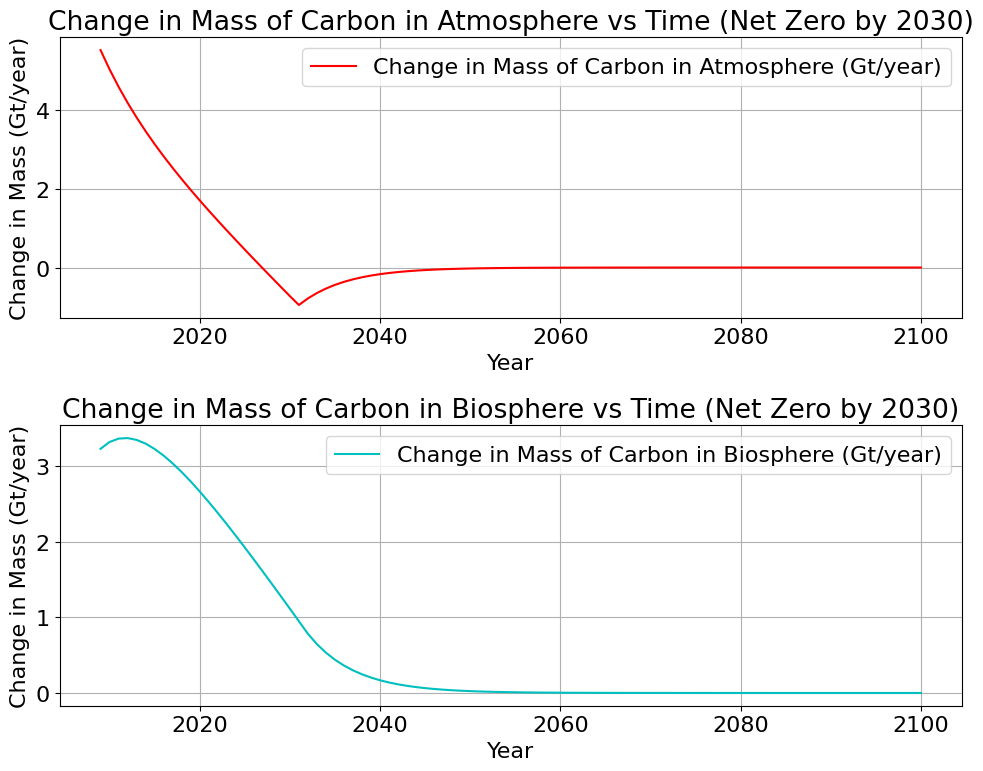

In [ ]:
t = year
dt = 1 # Time step interval value for yearly data
Nt = t.size # Outputs the number of time steps for variable "t"
M1 = np.zeros((Nt,)) # Creates an array of zeros with array length equal to Nt
M2 = np.zeros((Nt,))
print('t has '+str(Nt)+' time steps') # Explicitly state the number of time steps for "t"

for i in np.arange(Nt):
    if (i==0): # This is just to ensure that the initial carbon mass content is equal to the value defined in the beginning of this code.

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + cflux_nz2030[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the atmosphere (Gigatons per year)
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the biosphere (Gigatons per year)

        M1[i] = M1[i-1] + dM1dt*dt # Calculate the current carbon content of the atmosphere by adding the prior interval's carbon content to the product of the rate of change and time step interval
        M2[i] = M2[i-1] + dM2dt*dt # Same as above but for the biosphere

# Plot the mass of carbon in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t, M1, 'b-', label='Mass of Carbon in Atmosphere (Gt)')
plt.title('Mass of Carbon in Atmosphere vs Time (Net Zero by 2030)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Atmosphere (Gt)')
plt.grid(True)
plt.legend()

# Mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t, M2, 'g-', label='Mass of Carbon in Biosphere (Gt)')
plt.title('Mass of Carbon in Biosphere vs Time (Net Zero by 2030)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Biosphere (Gt)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('The final mass of carbon in the atmosphere is: '+str(M1[-1])+' Gt')
print('The final mass of carbon in the biosphere is: '+str(M2[-1])+' Gt')

# Calculate the change in mass over time (difference between consecutive time steps)
dM1 = np.diff(M1)
dM2 = np.diff(M2)

# Plot the change in mass of C in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Change in mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t[1:], dM1, 'r-', label='Change in Mass of Carbon in Atmosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Atmosphere vs Time (Net Zero by 2030)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

# Change in mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t[1:], dM2, 'c-', label='Change in Mass of Carbon in Biosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Biosphere vs Time (Net Zero by 2030)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


t has 93 time steps


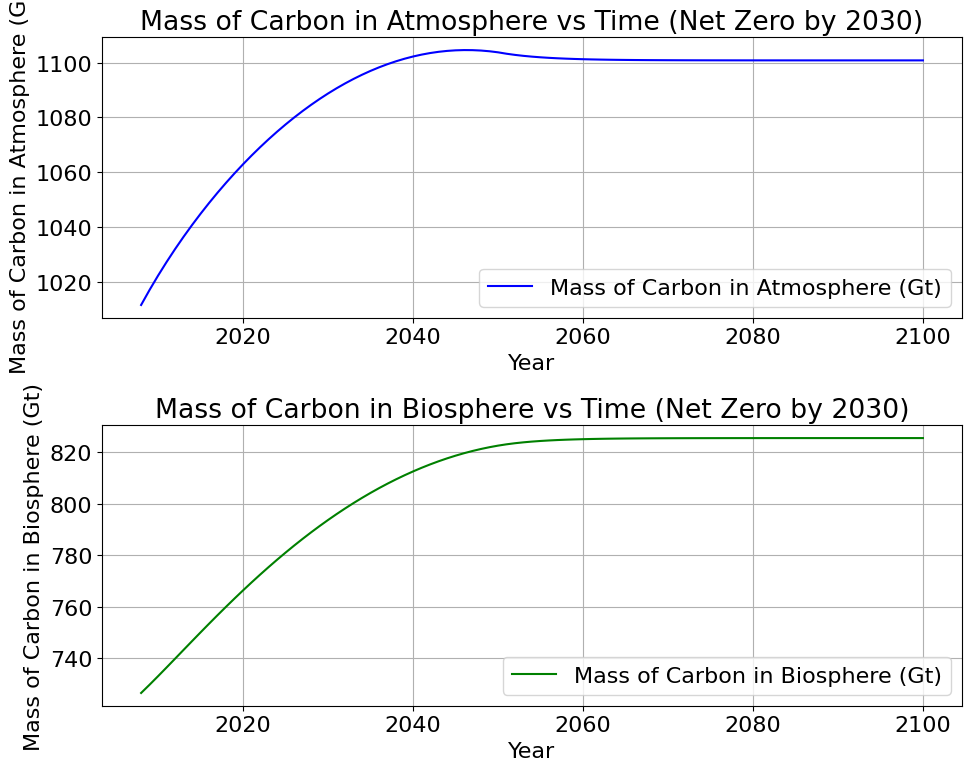

The final mass of carbon in the atmosphere is: 1100.7881955078178 Gt
The final mass of carbon in the biosphere is: 825.5908044921813 Gt


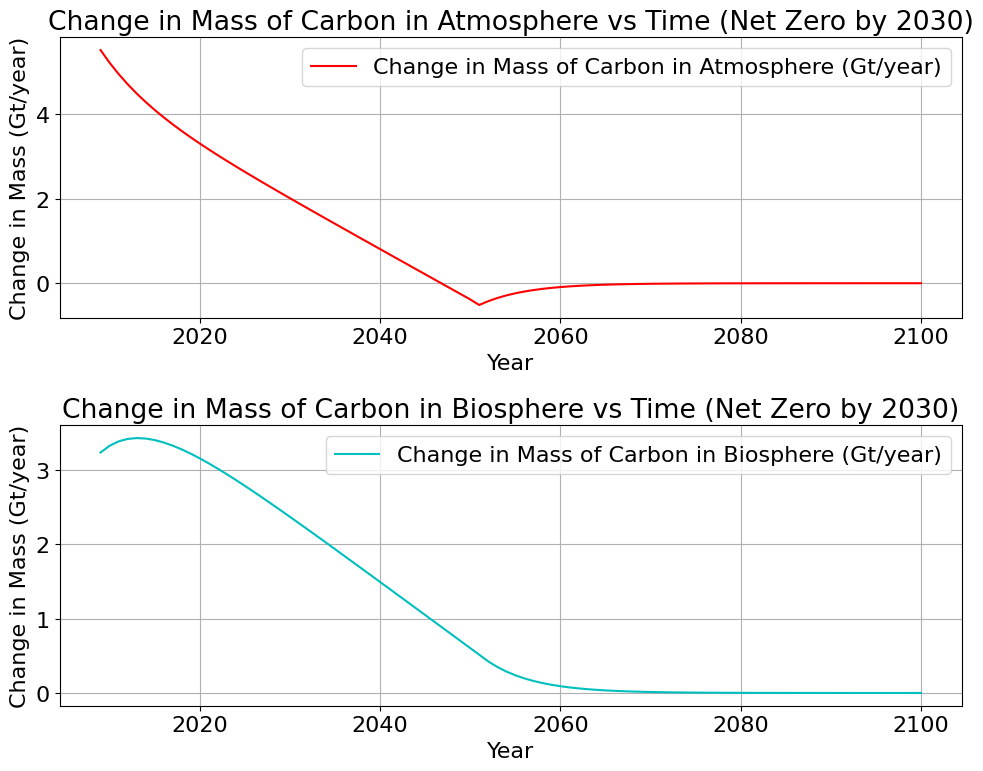

In [ ]:
t = year
dt = 1 # Time step interval value for yearly data
Nt = t.size # Outputs the number of time steps for variable "t"
M1 = np.zeros((Nt,)) # Creates an array of zeros with array length equal to Nt
M2 = np.zeros((Nt,))
print('t has '+str(Nt)+' time steps') # Explicitly state the number of time steps for "t"

for i in np.arange(Nt):
    if (i==0): # This is just to ensure that the initial carbon mass content is equal to the value defined in the beginning of this code.

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + cflux_nz2050[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the atmosphere (Gigatons per year)
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the biosphere (Gigatons per year)

        M1[i] = M1[i-1] + dM1dt*dt # Calculate the current carbon content of the atmosphere by adding the prior interval's carbon content to the product of the rate of change and time step interval
        M2[i] = M2[i-1] + dM2dt*dt # Same as above but for the biosphere

# Plot the mass of carbon in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t, M1, 'b-', label='Mass of Carbon in Atmosphere (Gt)')
plt.title('Mass of Carbon in Atmosphere vs Time (Net Zero by 2050)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Atmosphere (Gt)')
plt.grid(True)
plt.legend()

# Mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t, M2, 'g-', label='Mass of Carbon in Biosphere (Gt)')
plt.title('Mass of Carbon in Biosphere vs Time (Net Zero by 2050)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Biosphere (Gt)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('The final mass of carbon in the atmosphere is: '+str(M1[-1])+' Gt')
print('The final mass of carbon in the biosphere is: '+str(M2[-1])+' Gt')

# Calculate the change in mass over time (difference between consecutive time steps)
dM1 = np.diff(M1)
dM2 = np.diff(M2)

# Plot the change in mass of C in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Change in mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t[1:], dM1, 'r-', label='Change in Mass of Carbon in Atmosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Atmosphere vs Time (Net Zero by 2050)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

# Change in mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t[1:], dM2, 'c-', label='Change in Mass of Carbon in Biosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Biosphere vs Time (Net Zero by 2050)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

t has 93 time steps


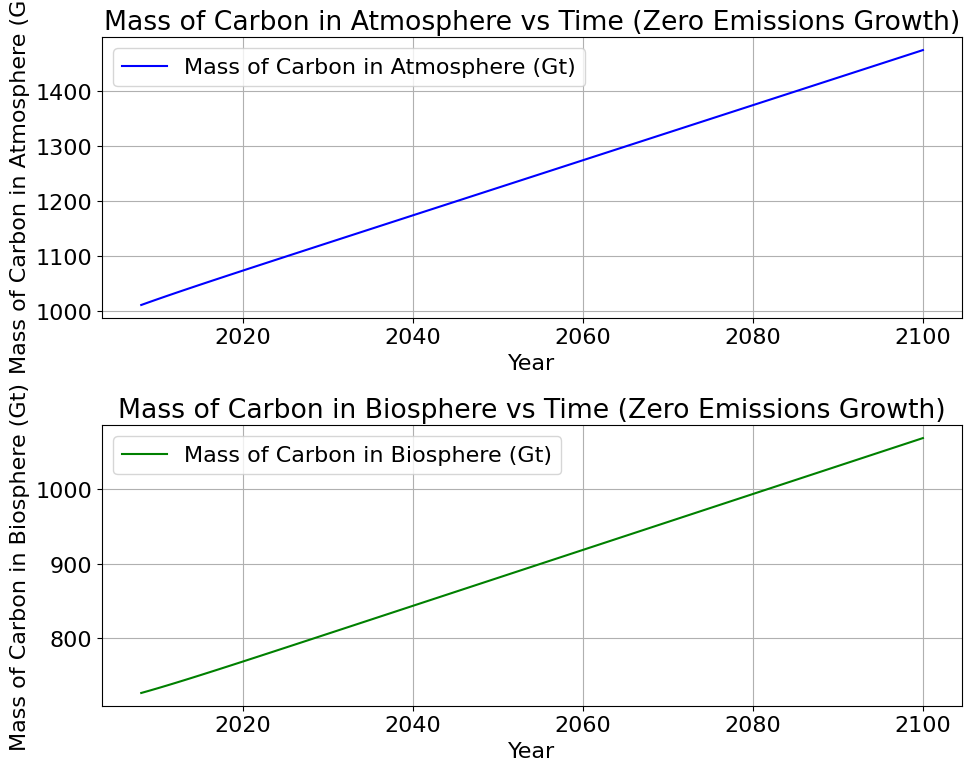

The final mass of carbon in the atmosphere is: 1474.5215509596458 Gt
The final mass of carbon in the biosphere is: 1068.3954490403528 Gt


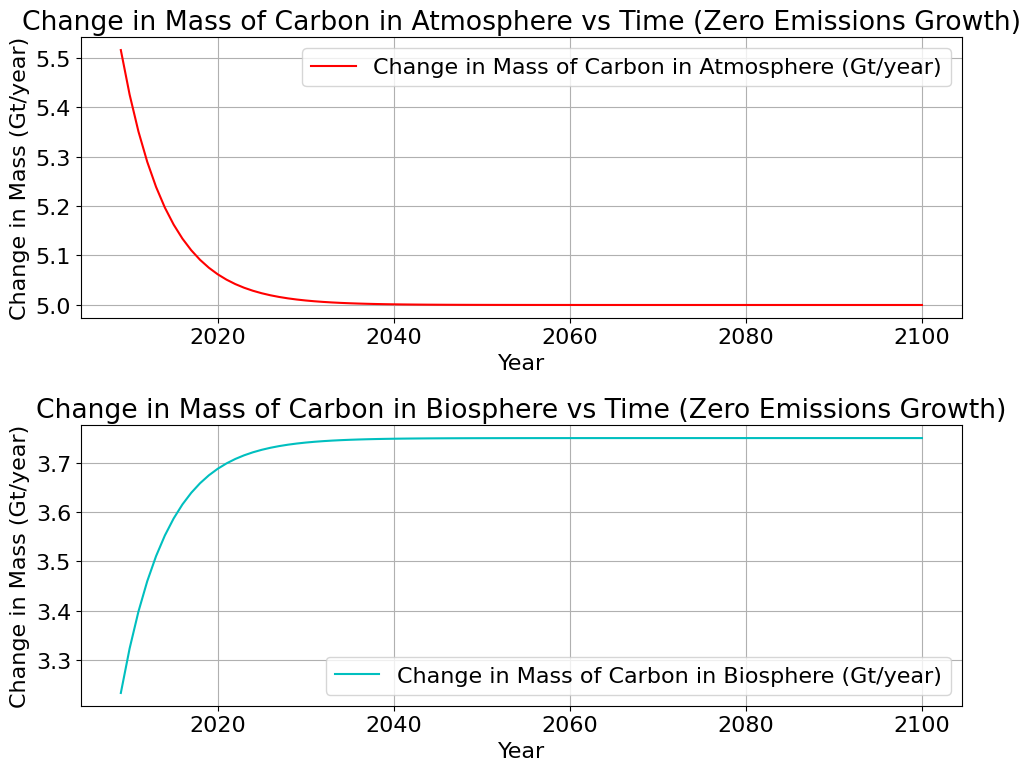

In [ ]:
t = year
dt = 1 # Time step interval value for yearly data
Nt = t.size # Outputs the number of time steps for variable "t"
M1 = np.zeros((Nt,)) # Creates an array of zeros with array length equal to Nt
M2 = np.zeros((Nt,))
print('t has '+str(Nt)+' time steps') # Explicitly state the number of time steps for "t"

for i in np.arange(Nt):
    if (i==0): # This is just to ensure that the initial carbon mass content is equal to the value defined in the beginning of this code.

        M1[i] = M1i
        M2[i] = M2i

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + cflux_zeg[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the atmosphere (Gigatons per year)
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # For all time intervals greater than 0, calculate the rate of change of carbon in the biosphere (Gigatons per year)

        M1[i] = M1[i-1] + dM1dt*dt # Calculate the current carbon content of the atmosphere by adding the prior interval's carbon content to the product of the rate of change and time step interval
        M2[i] = M2[i-1] + dM2dt*dt # Same as above but for the biosphere

# Plot the mass of carbon in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t, M1, 'b-', label='Mass of Carbon in Atmosphere (Gt)')
plt.title('Mass of Carbon in Atmosphere vs Time (Zero Emissions Growth)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Atmosphere (Gt)')
plt.grid(True)
plt.legend()

# Mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t, M2, 'g-', label='Mass of Carbon in Biosphere (Gt)')
plt.title('Mass of Carbon in Biosphere vs Time (Zero Emissions Growth)')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon in Biosphere (Gt)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print('The final mass of carbon in the atmosphere is: '+str(M1[-1])+' Gt')
print('The final mass of carbon in the biosphere is: '+str(M2[-1])+' Gt')

# Calculate the change in mass over time (difference between consecutive time steps)
dM1 = np.diff(M1)
dM2 = np.diff(M2)

# Plot the change in mass of C in the atmosphere and biosphere over time
plt.figure(figsize=(10, 8))

# Change in mass of C in the atmosphere vs time
plt.subplot(2, 1, 1)
plt.plot(t[1:], dM1, 'r-', label='Change in Mass of Carbon in Atmosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Atmosphere vs Time (Zero Emissions Growth)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

# Change in mass of C in the biosphere vs time
plt.subplot(2, 1, 2)
plt.plot(t[1:], dM2, 'c-', label='Change in Mass of Carbon in Biosphere (Gt/year)')
plt.title('Change in Mass of Carbon in Biosphere vs Time (Zero Emissions Growth)')
plt.xlabel('Year')
plt.ylabel('Change in Mass (Gt/year)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()